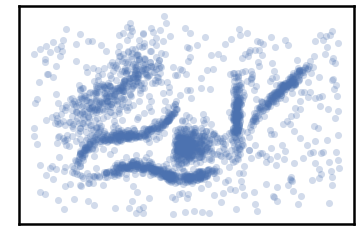

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import urllib.request
import hdbscan


sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
# plot_kwds = {}

urllib.request.urlretrieve(
    'https://github.com/scikit-learn-contrib/hdbscan/raw/master/notebooks/clusterable_data.npy',
    'clusterable_data.npy'
)
data = np.load('clusterable_data.npy')
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [36]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    plt.title(f'{algorithm.__name__}, time={end_time - start_time:.3f}s', fontsize=14)


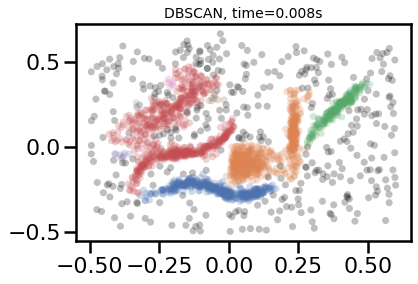

In [42]:
# plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})
# plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})
# plot_clusters(data, cluster.MeanShift, (), {'bandwidth':0.175, 'cluster_all':False})
# plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})
# plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

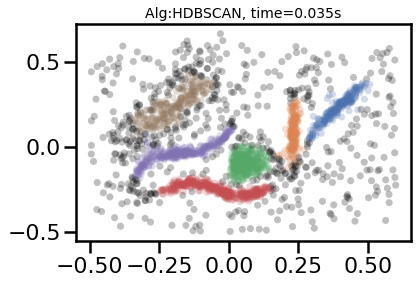

In [19]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':20})